### Exploratory Data Analysis & Feature Engineering

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [2]:
# Load the processed data
df = pd.read_csv('../../data/processed/tft_match_data.csv')

df.fillna(0, inplace=True)

df.head()

,match_id,puuid,placement,total_damage_to_players,time_eliminated,gold_left,last_round,level,augments,TFT11_Arcanist_style,...,TFT11_Tristana_value,TFT11_Lissandra_tier,TFT11_Lissandra_rarity,TFT11_Lissandra_value,TFT11_Xayah_tier,TFT11_Xayah_rarity,TFT11_Xayah_value,TFT11_Teemo_tier,TFT11_Teemo_rarity,TFT11_Teemo_value
0,NA1_5011902551,MhIfKeaNP_kJof4xr0lSz3Lzx88ISuSl3xxkhAqc2TjcQa...,5,103,1955.836182,18,31,9,"TFT11_Augment_BehemothCrest, TFT9_Augment_Impe...",2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NA1_5011902551,yuZoB0MFxA_cyz37eCNigEsWpcp3hUfvMMX_wZi01cZONr...,1,166,2247.784424,5,37,9,"TFT9_Augment_JeweledLotus, TFT6_Augment_GachaA...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NA1_5011902551,OLPdqP1PRyhxNVZxoBSujdMXakEjZomEj3NsAkelBGJzuu...,6,71,1797.590820,25,28,8,"TFT11_Augment_Bruiser, TFT6_Augment_GachaAddic...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NA1_5011902551,fxLV3G-eEyT0UwTj8iSeX6dxeIFB8RXezl3hXs3VmVk9Tu...,4,133,2114.744629,0,34,10,"TFT11_Augment_Slammin, TFT6_Augment_RadiantRel...",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NA1_5011902551,KHuvVpkNLW1ezFlchpd3B0IQXqnv6NTCbf4QfM1MgP0DDv...,3,133,2116.264648,3,34,9,"TFT11_Augment_Mythic, TFT9_Augment_PandorasRad...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.describe()

,placement,total_damage_to_players,time_eliminated,gold_left,last_round,level,TFT11_Arcanist_style,TFT11_Behemoth_style,TFT11_Dryad_style,TFT11_Exalted_style,...,TFT11_Tristana_value,TFT11_Lissandra_tier,TFT11_Lissandra_rarity,TFT11_Lissandra_value,TFT11_Xayah_tier,TFT11_Xayah_rarity,TFT11_Xayah_value,TFT11_Teemo_tier,TFT11_Teemo_rarity,TFT11_Teemo_value
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,...,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,4.500000,97.022590,1935.202957,11.831325,32.400602,8.375000,0.430723,0.317771,0.454819,0.114458,...,2.222892,0.118976,0.621988,3.131024,0.045181,0.242470,1.170181,0.114458,0.102410,1.427711
std,2.293015,49.905683,269.479724,21.564212,4.618058,0.799345,0.643816,0.599082,0.934220,0.493244,...,10.259162,0.406584,1.993246,11.655539,0.253615,1.281003,7.153749,0.508304,0.441163,7.266374
min,1.000000,0.000000,934.544189,0.000000,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,57.000000,1739.036682,1.000000,29.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,91.000000,1966.419067,2.000000,33.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.250000,131.250000,2135.761475,15.000000,35.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,232.000000,2563.969482,223.000000,44.000000,10.000000,3.000000,3.000000,3.000000,3.000000,...,81.000000,2.000000,7.000000,63.000000,2.000000,7.000000,63.000000,3.000000,2.000000,54.000000


In [4]:
# Check for missing values
df.isnull().sum()

match_id                   0
puuid                      0
placement                  0
total_damage_to_players    0
time_eliminated            0
                          ..
TFT11_Xayah_rarity         0
TFT11_Xayah_value          0
TFT11_Teemo_tier           0
TFT11_Teemo_rarity         0
TFT11_Teemo_value          0
Length: 219, dtype: int64

In [5]:
trait_columns = [col for col in df.columns if col.endswith('_style')]

# Adding activated traits to the dataframe based on style levels
for trait in trait_columns:
    df[f'{trait}_activated'] = df[trait].apply(lambda x: x > 0)

#### Analysis of most popular activated traits

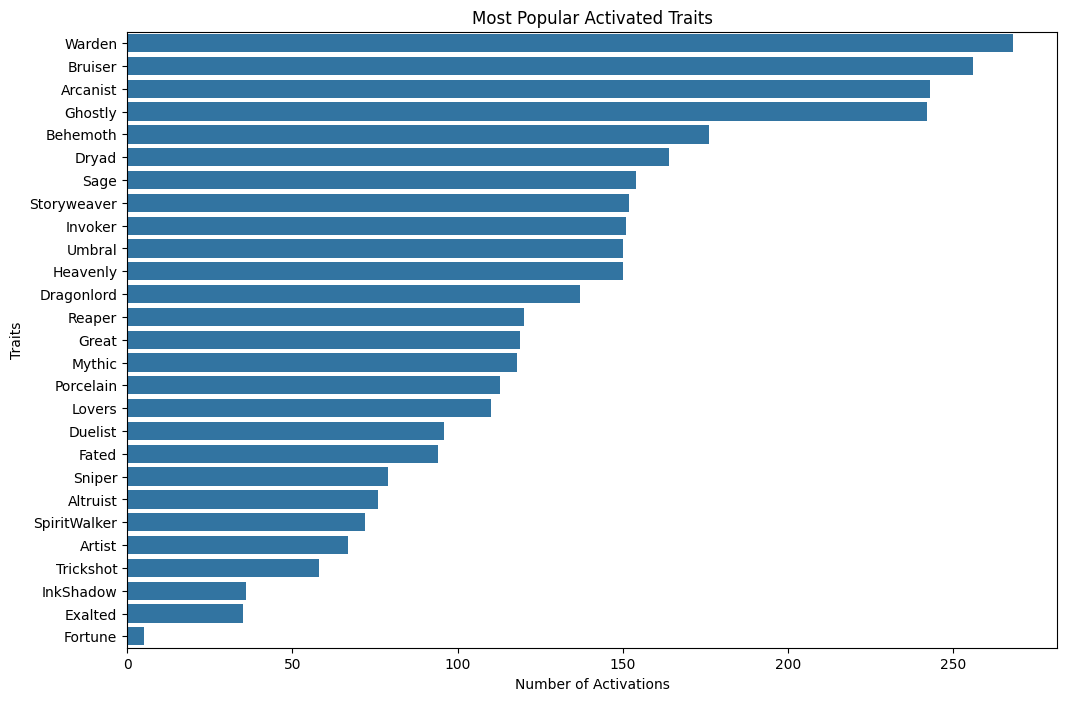

In [6]:
activated_traits = [col for col in df.columns if col.endswith('_activated')]
popular_traits = df[activated_traits].sum().sort_values(ascending=False)

popular_traits.index = [trait.replace('_style_activated', '').replace('TFT11_', '') for trait in popular_traits.index]

plt.figure(figsize=(12, 8))
sns.barplot(x=popular_traits.values, y=popular_traits.index)
plt.title('Most Popular Activated Traits')
plt.xlabel('Number of Activations')
plt.ylabel('Traits')
plt.show()


#### Correlation matrix with relevant variables

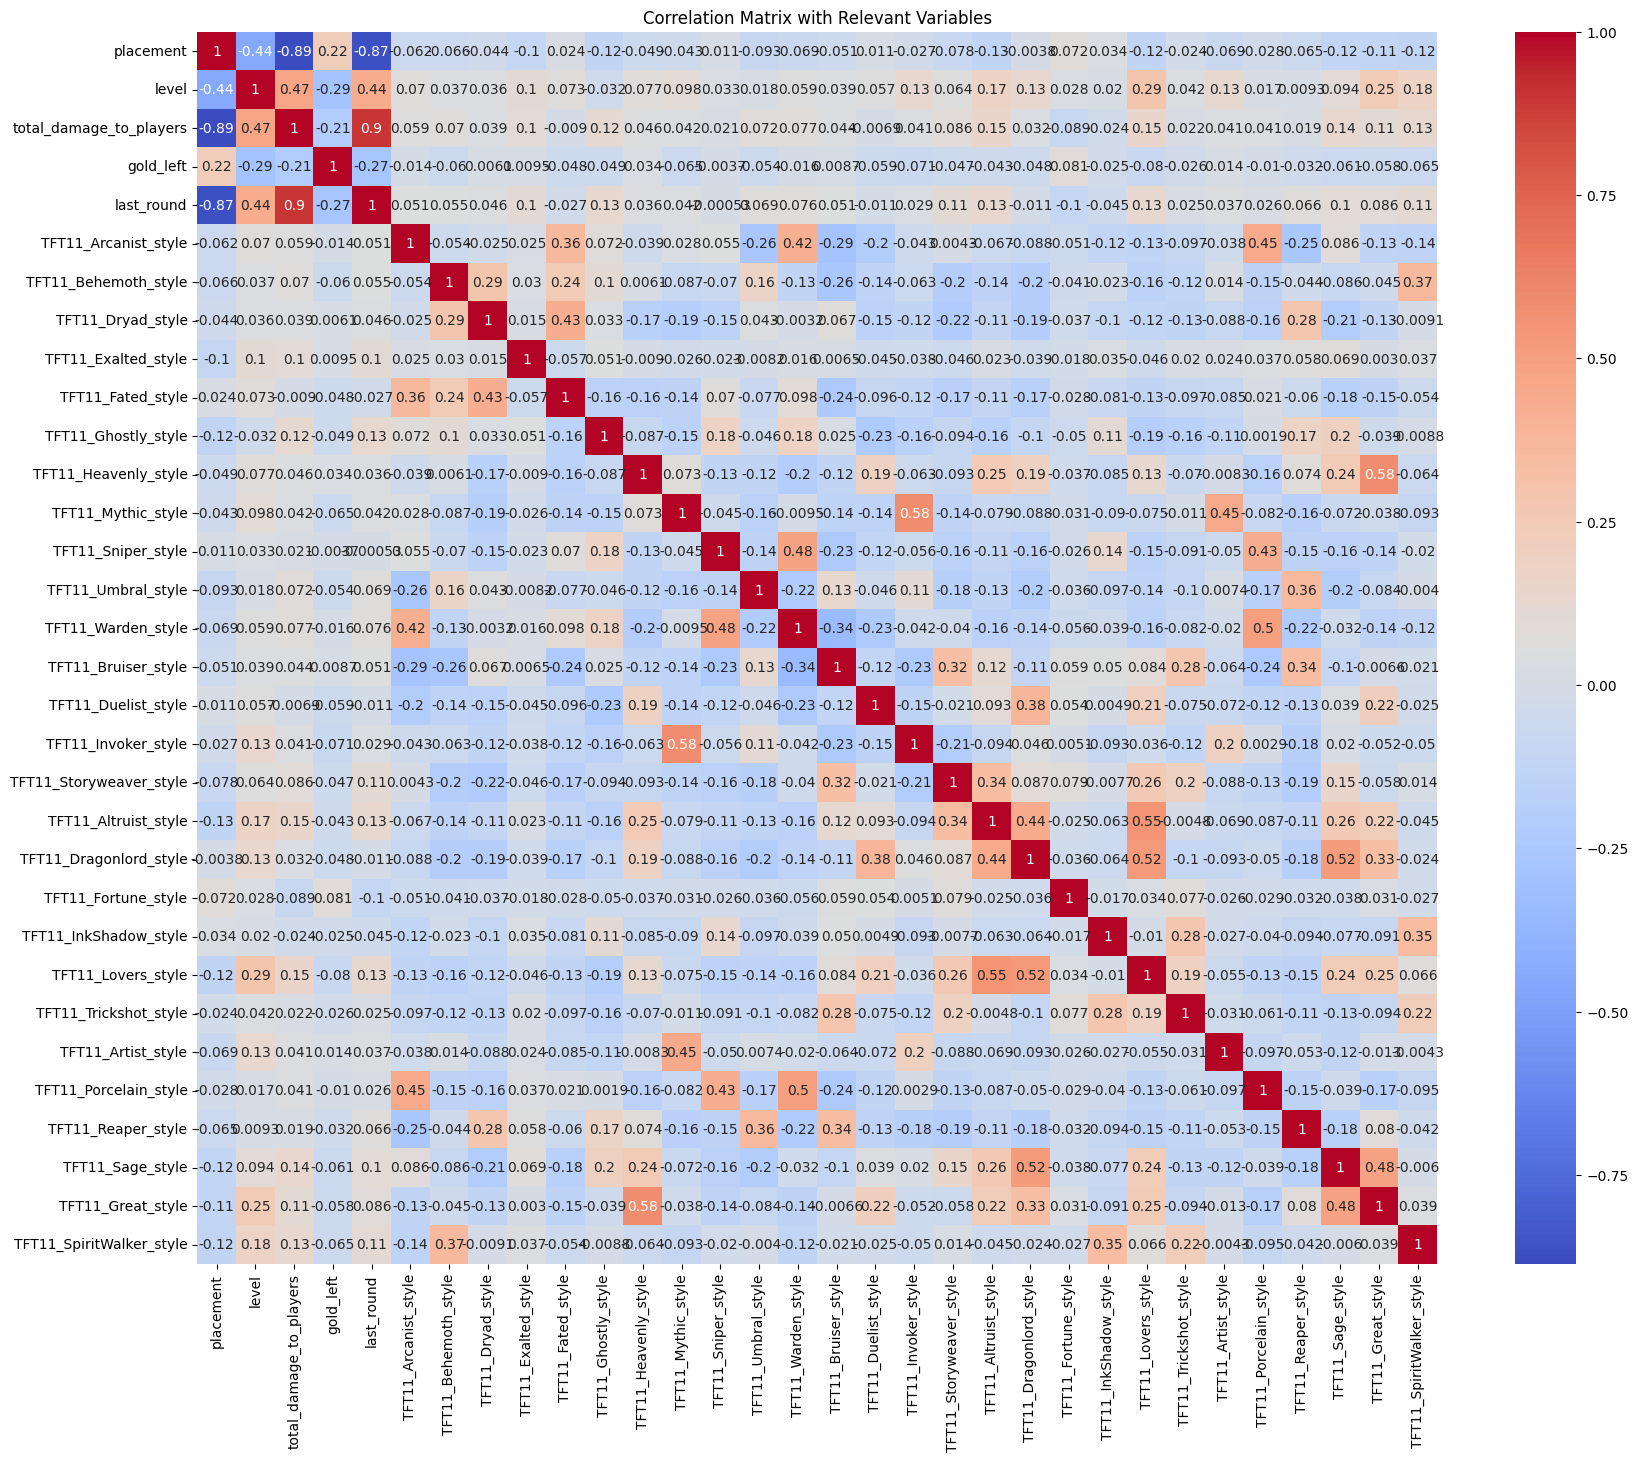

In [7]:
relevant_columns = ['placement', 'level', 'total_damage_to_players', 'gold_left', 'last_round'] + trait_columns
correlation_matrix = df[relevant_columns].corr()

plt.figure(figsize=(len(relevant_columns)/2 + 4, len(relevant_columns)/2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Relevant Variables')
plt.show()

### Feature Engineering

In [8]:
# Count the number of activated traits for each participant
df['num_activated_traits'] = df[activated_traits].sum(axis=1)

# Calculate the average rarity of units for each participant, considering only units with rarity ≥ 1
unit_value_columns = [col for col in df.columns if col.endswith('_value')]
df['total_unit_values'] = df[unit_value_columns].apply(lambda row: np.sum([val for val in row]), axis=1)

# Calculate the average tier of units for each participant, considering only units with tier ≥ 1
unit_tier_columns = [col for col in df.columns if col.endswith('_tier')]
df['avg_unit_tiers'] = df[unit_tier_columns].apply(lambda row: np.mean([val for val in row if val >= 1]), axis=1)

# Calculate the average rarity of units for each participant, considering only units with rarity ≥ 1
unit_rarity_columns = [col for col in df.columns if col.endswith('_rarity')]
df['avg_unit_rarities'] = df[unit_rarity_columns].apply(lambda row: np.mean([val for val in row if val >= 1]), axis=1)

# Create a list of activated traits for each participant
df['activated_traits_list'] = df[activated_traits].apply(lambda row: [trait.replace('_style_activated', '') for trait in activated_traits if row[trait]], axis=1)

# Create a list of units on the board (units with tier > 1) for each participant
df['units_on_board'] = df[unit_tier_columns].apply(lambda row: [unit.replace('_tier', '') for unit in unit_tier_columns if row[unit] >= 1], axis=1)

# One-hot encode augments
df_augments = df['augments'].str.get_dummies(sep=',')
df = pd.concat([df, df_augments], axis=1)

# Display only the engineered columns
engineered_df = df[['placement', 'num_activated_traits', 'total_unit_values', 'avg_unit_tiers', 'avg_unit_rarities', 'activated_traits_list', 'units_on_board']]

# Display the first few rows of the dataframe after feature engineering
engineered_df

,placement,num_activated_traits,total_unit_values,avg_unit_tiers,avg_unit_rarities,activated_traits_list,units_on_board
0,5,5,171.0,1.555556,3.444444,"[TFT11_Arcanist, TFT11_Behemoth, TFT11_Fated, ...","[TFT11_Ahri, TFT11_Shen, TFT11_Neeko, TFT11_Il..."
1,1,6,432.0,2.222222,4.222222,"[TFT11_Mythic, TFT11_Umbral, TFT11_Warden, TFT...","[TFT11_Sett, TFT11_Darius, TFT11_Yorick, TFT11..."
2,6,1,213.0,2.125000,2.625000,[TFT11_Bruiser],"[TFT11_TahmKench, TFT11_Sylas, TFT11_FortuneYo..."
3,4,8,384.0,2.090909,3.818182,"[TFT11_Arcanist, TFT11_Heavenly, TFT11_Bruiser...","[TFT11_Neeko, TFT11_Riven, TFT11_Galio, TFT11_..."
4,3,3,300.0,2.000000,4.000000,"[TFT11_Mythic, TFT11_Invoker, TFT11_Artist]","[TFT11_Neeko, TFT11_TahmKench, TFT11_Lillia, T..."
...,...,...,...,...,...,...,...
659,6,3,324.0,2.125000,3.750000,"[TFT11_Warden, TFT11_Storyweaver, TFT11_Tricks...","[TFT11_Illaoi, TFT11_Nautilus, TFT11_Galio, TF..."
660,4,4,270.0,2.111111,2.888889,"[TFT11_Behemoth, TFT11_Dryad, TFT11_Ghostly, T...","[TFT11_Shen, TFT11_Illaoi, TFT11_Ornn, TFT11_R..."
661,3,7,303.0,2.285714,3.285714,"[TFT11_Arcanist, TFT11_Ghostly, TFT11_Warden, ...","[TFT11_Illaoi, TFT11_Janna, TFT11_Annie, TFT11..."
662,5,6,162.0,1.857143,2.857143,"[TFT11_Arcanist, TFT11_Ghostly, TFT11_Warden, ...","[TFT11_Illaoi, TFT11_Janna, TFT11_Amumu, TFT11..."


In [9]:
# Save the dataframe with new features
df.to_csv('../../data/processed/tft_match_data_with_features.csv', index=False)